In [1]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
df = pd.read_csv('LanguageDetectionData.csv')
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_pun(text):
    for pun in string.punctuation:
        text = text.replace(pun,"")
    text = text.lower()
    return text

In [11]:
remove_pun("Although humans are part of nature, human acti...")

'although humans are part of nature human acti'

In [26]:
df['Text'] = df['Text'].apply(remove_pun)
df

,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,1 the word nature is borrowed from the old fre...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [16]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
len(X_train) == len(Y_train)

True

In [23]:
len(X_test) == len(Y_test)

True

In [24]:
len(X_train)

8269

In [25]:
len(X_test)

2068

In [27]:
from sklearn import feature_extraction

In [33]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2), 
                                              analyzer='char')

In [34]:
from sklearn import pipeline
from sklearn import linear_model

In [38]:
model = pipeline.Pipeline([('vec', vec),
                   ('clf', 
                    linear_model.LogisticRegression())
                  ])

In [39]:
model.fit(X_train, Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [45]:
Y_predicted = model.predict(X_test)

In [42]:
Y_test

9077        Arabic
3187    Portugeese
360        English
2558    Portugeese
9067        Arabic
           ...    
7552       Italian
7381       Italian
3027    Portugeese
9883        German
9808        German
Name: Language, Length: 2068, dtype: object

In [43]:
from sklearn import metrics

In [46]:
metrics.accuracy_score(Y_test, Y_predicted)

0.9772727272727273

In [47]:
metrics.confusion_matrix(Y_test, Y_predicted)

array([[124,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,  87,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   0],
       [  0,   0, 109,   3,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   1, 283,   0,   1,   0,   0,   1,   0,   0,   0,   0,
          1,   0,   0,   0],
       [  0,   0,   0,   0, 191,   0,   0,   0,   1,   0,   0,   0,   0,
          1,   0,   0,   1],
       [  0,   0,   1,   1,   0,  85,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  67,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  10,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   1,   1,   0,   0,   0, 136,   0,   0,   1,   0,
          4,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68,   0,   0,   0,
         

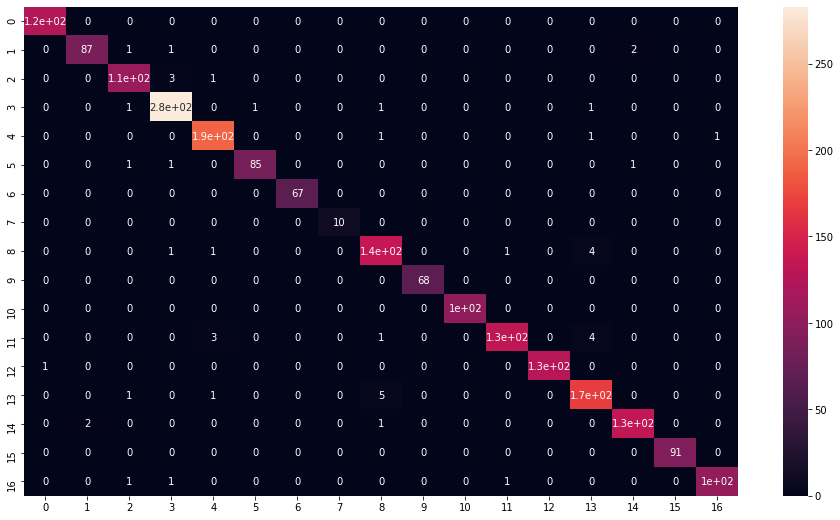

In [67]:
cm = metrics.confusion_matrix(Y_test, Y_predicted)
plt.figure(figsize = (16,9))
# plt.xlabel("Y_test")
# plt.ylabel("Y_predicted")
sns.heatmap(cm, annot=True)

In [71]:
model.predict(['ब्रेकिंग न्यूज़ समाचार, ताजा खबर'])

array(['Hindi'], dtype=object)

In [73]:
model.predict(['Je suis Paul'])

array(['French'], dtype=object)

In [75]:
model.predict(['Tu hablas engles'])

array(['Spanish'], dtype=object)

In [77]:
import os
import pickle

In [80]:
new_file = open('LangDetect.pckl', 'wb')
pickle.dump(model, new_file)
new_file.close()

In [82]:
os.listdir()

['.ipynb_checkpoints',
 'LangDetect.pckl',
 'LanguageDetection.ipynb',
 'LanguageDetectionData.csv']